In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [43]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

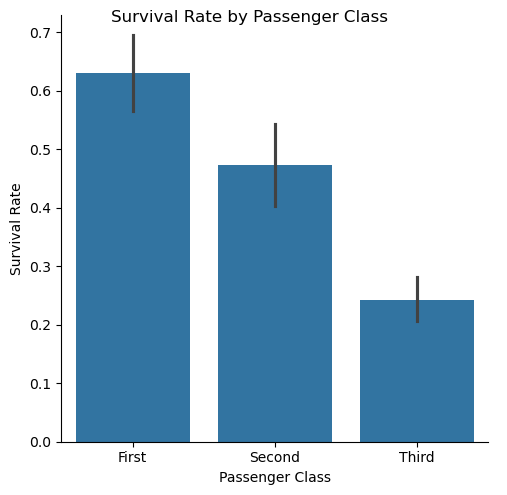

In [44]:
p = sns.catplot(data=titanic, x="class", y="survived", kind="bar")
p.fig.suptitle("Survival Rate by Passenger Class")  
p.set_axis_labels("Passenger Class", "Survival Rate")
plt.show()

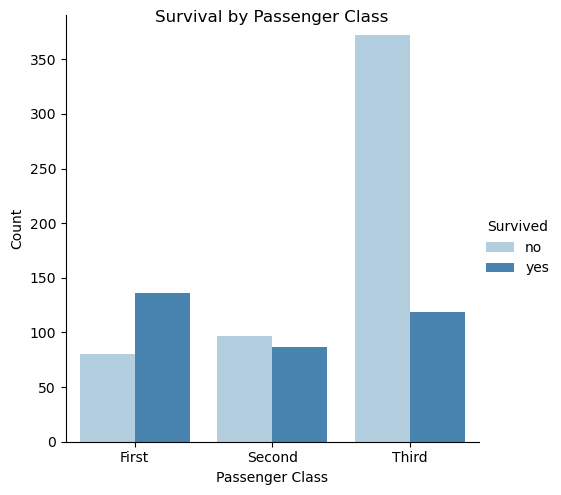

In [32]:
p = sns.catplot(data=titanic, x="class", hue="alive", kind="count", palette='Blues')

p.fig.suptitle("Survival by Passenger Class")  
p.set_axis_labels("Passenger Class", "Count")
p._legend.set_title("Survived") 

plt.show()

In [14]:
survivors = titanic[titanic['survived']==1]

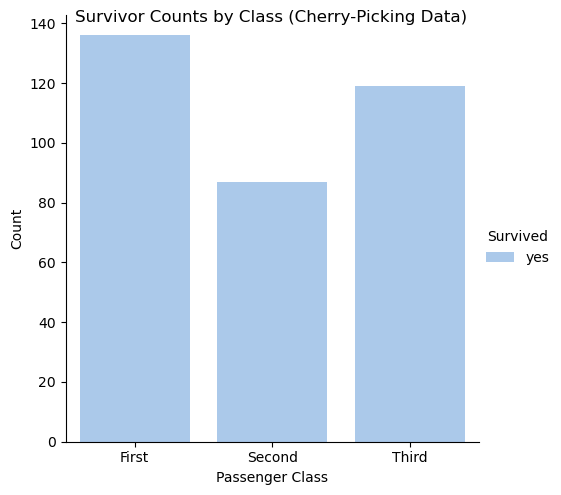

In [46]:
p = sns.catplot(data=survivors, x="class", hue='alive', kind="count", palette='pastel')
p.fig.suptitle("Survivor Counts by Class (Cherry-Picking Data)")  
p.set_axis_labels("Passenger Class", "Count")
p._legend.set_title("Survived")
plt.show()

/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/2306774588.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic.groupby('class')['survived'].mean().reset_index()
/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/2306774588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate, y='survived', x='class', palette='pastel')


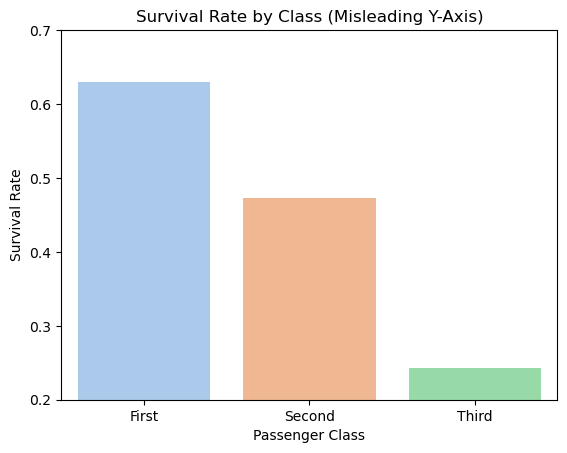

In [39]:
# Calculate survival rate by class
survival_rate = titanic.groupby('class')['survived'].mean().reset_index()

# Create the misleading bar plot
sns.barplot(data=survival_rate, y='survived', x='class', palette='pastel')

# Truncate the y-axis to exaggerate differences
plt.ylim(0.2, 0.7)  # Starting y-axis above 0

# Add title and labels
plt.title("Survival Rate by Class (Misleading Y-Axis)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

plt.show()

/var/folders/mj/_5nwhhkd5cjbp6mcqnk7hh540000gn/T/ipykernel_19733/2409212729.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_data = titanic.groupby('class')['survived'].agg(['sum', 'mean']).reset_index()


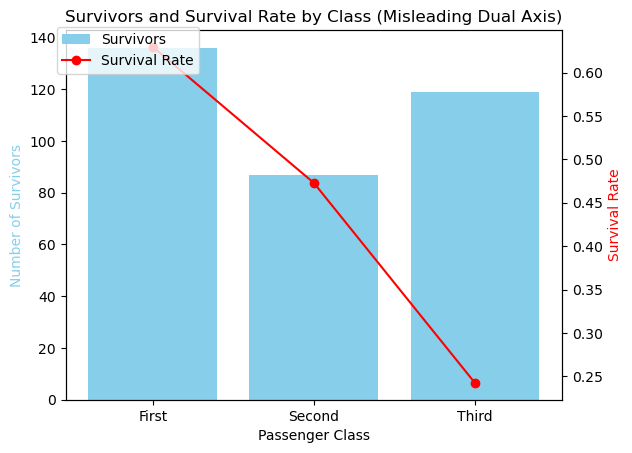

In [40]:
# Sample survival data by class
survival_data = titanic.groupby('class')['survived'].agg(['sum', 'mean']).reset_index()

fig, ax1 = plt.subplots()

# Bar plot for the number of survivors
ax1.bar(survival_data['class'], survival_data['sum'], color='skyblue', label='Survivors')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Survivors', color='skyblue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(survival_data['class'], survival_data['mean'], color='red', marker='o', label='Survival Rate')
ax2.set_ylabel('Survival Rate', color='red')

# Add title and legend
plt.title("Survivors and Survival Rate by Class (Misleading Dual Axis)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()